In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 24.1 MB/s eta 0:00:00


In [ ]:
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np
import pandas as pd

In [ ]:
vidcap = cv2.VideoCapture('a.mp4')

In [ ]:
success,image = vidcap.read()
count = 0

In [ ]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

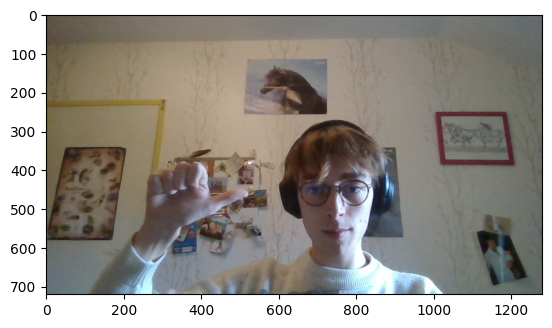

In [ ]:
plt.figure()
plt.imshow(img_rgb)
plt.show()

In [ ]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [ ]:
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

In [ ]:
#draw landmarks
results = hands.process(img_rgb)
if results.multi_hand_landmarks:
      mp_drawing.draw_landmarks(
      img_rgb,  # image to draw
      results.multi_hand_landmarks[0],  # model output
      mp_hands.HAND_CONNECTIONS,  # hand connections
      mp_drawing_styles.get_default_hand_landmarks_style(),
      mp_drawing_styles.get_default_hand_connections_style())

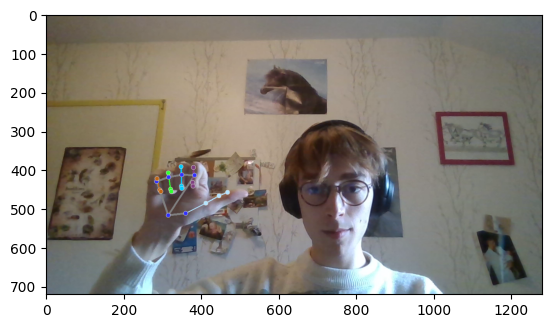

In [ ]:
plt.figure()
plt.imshow(img_rgb)
plt.show()

In [ ]:
points = []
points.append([1])

In [ ]:
# get landmarks
#results = hands.process(img_rgb)
if results.multi_hand_landmarks:
  for  i in results.multi_hand_landmarks[0].landmark:
    points[0].append(i.x)
    points[0].append(i.y)

In [ ]:
points

[[1]]

# Traitement video lettres

## Le A

In [ ]:
data = []

In [ ]:
lettre = 0

In [ ]:
vidcap = cv2.VideoCapture('lettre_0.mp4')

In [ ]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [ ]:
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

In [ ]:
success,image = vidcap.read()
count = 0

In [ ]:
while success:
  img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  ligne = [lettre]
  results = hands.process(img_rgb)
  if results.multi_hand_landmarks:
    for  i in results.multi_hand_landmarks[0].landmark:
      ligne.append(i.x)
      ligne.append(i.y)
    data.append(ligne)

  success,image = vidcap.read()

In [ ]:
for i in data:
  if len(i) != 43:
    print(len(i))

In [ ]:
l=[]
for i in range(21):
  l.append("x_"+str(i))
  l.append("y_"+str(i))

In [ ]:
df = pd.DataFrame(data, columns=['lettre']+l)

## Généralisation

In [ ]:
data = []

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

In [ ]:
for lettre in range(3):
  vidcap = cv2.VideoCapture('lettre_'+str(lettre)+'.mp4')

  success,image = vidcap.read()
  count = 0

  while success:
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ligne = [lettre]
    results = hands.process(img_rgb)
    if results.multi_hand_landmarks:
      for  i in results.multi_hand_landmarks[0].landmark:
        ligne.append(i.x)
        ligne.append(i.y)
      data.append(ligne)

    success,image = vidcap.read()


In [ ]:
# Nom des colonnes
l=[]
for i in range(21):
  l.append("x_"+str(i))
  l.append("y_"+str(i))

In [ ]:
df = pd.DataFrame(data, columns=['lettre']+l)

In [ ]:
df.to_csv('landmarks.csv')

In [ ]:
len(data)

464